# I. Import Libraries and Load Dataset

In [1]:
# Importing Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset

df = pd.read_excel('CustomerChurn.xlsx')

# II. Data Cleansing

## 2.1 Identify data types

In [3]:
df.dtypes # 'Total Charges' should be numerical

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [4]:
df.shape

(7043, 21)

## 2.2 Dealing with unusual values and data types

### 2.2.1. Categorical variables

In [5]:
# Isolate categorical attributes

cat = df.drop(labels = ['LoyaltyID', 'Customer ID', 'Tenure', 'Monthly Charges', 'Total Charges'], axis = 1)

In [6]:
# Check for the unique values of categorical attributes

for col in cat:
    print(col,':', cat[col].unique(),"-->", cat[col].nunique(), 'values')
    
# No unusual value

Senior Citizen : ['No' 'Yes'] --> 2 values
Partner : ['Yes' 'No'] --> 2 values
Dependents : ['No' 'Yes'] --> 2 values
Phone Service : ['No' 'Yes'] --> 2 values
Multiple Lines : ['No phone service' 'No' 'Yes'] --> 3 values
Internet Service : ['DSL' 'Fiber optic' 'No'] --> 3 values
Online Security : ['No' 'Yes' 'No internet service'] --> 3 values
Online Backup : ['Yes' 'No' 'No internet service'] --> 3 values
Device Protection : ['No' 'Yes' 'No internet service'] --> 3 values
Tech Support : ['No' 'Yes' 'No internet service'] --> 3 values
Streaming TV : ['No' 'Yes' 'No internet service'] --> 3 values
Streaming Movies : ['No' 'Yes' 'No internet service'] --> 3 values
Contract : ['Month-to-month' 'One year' 'Two year'] --> 3 values
Paperless Billing : ['Yes' 'No'] --> 2 values
Payment Method : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] --> 4 values
Churn : ['No' 'Yes'] --> 2 values


### 2.2.2. Numerical variables

In [7]:
num = df[['Tenure', 'Monthly Charges', 'Total Charges']]

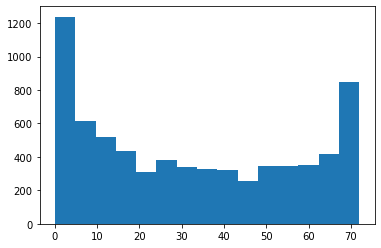

In [8]:
num_bin = 15 # determine the value of bins

plt.hist(num['Tenure'], bins = num_bin)
plt.show()

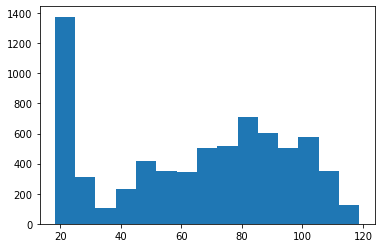

In [9]:
plt.hist(num['Monthly Charges'], bins = num_bin)
plt.show()

In [10]:
num[num['Tenure'] == 0] 

# turns out data points with Tenure value 0 have blank value for Total Charges

,Tenure,Monthly Charges,Total Charges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


### 2.2.3. Fixing inapproriate data types

In [11]:
# Remember that Total Charges needs to be numerical
# First we need to fill the blank value with zeros

for i in range(len(df)):
    if df.loc[i, 'Tenure'] == 0:
        df.loc[i, 'Total Charges'] = 0

In [12]:
# transform string into float

df['Total Charges'] = df['Total Charges'].astype(float)
df.dtypes

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

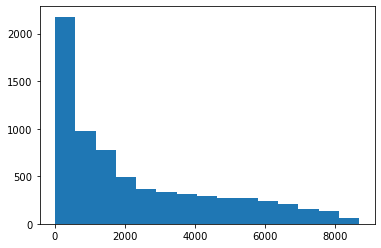

In [13]:
plt.hist(df['Total Charges'], bins = num_bin)
plt.show()

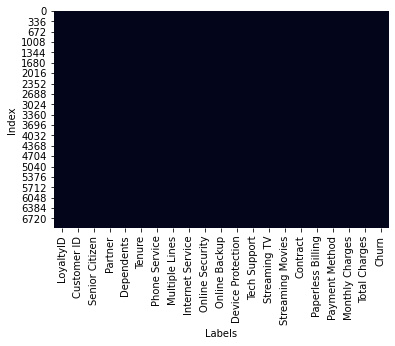

In [14]:
#Heatmap
# To check for null values

sns.heatmap(df.isnull(), cbar=False)

plt.xlabel('Labels')
plt.ylabel('Index')
plt.show()

# No Nulls

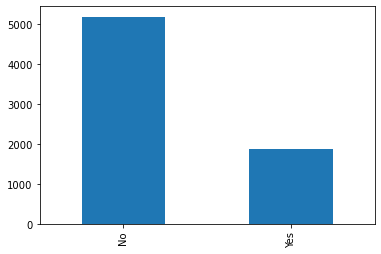

In [23]:
df['Churn'].value_counts().plot(kind = 'bar')
plt.show()

In [38]:
# Churn ratio

df.groupby(by = 'Churn').size() / len(df) * 100

Churn
No     73.463013
Yes    26.536987
dtype: float64

In [15]:
# We can drop LoyaltyID and Customer ID as they do not provide any value to our analysis later on

dcleansed = df.drop(labels = ['LoyaltyID', 'Customer ID'], axis = 1)

# Finally, our dataset is cleansed!

In [16]:
dcleansed

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Export Dataset to CSV File

In [18]:
dcleansed.to_csv('CustomerChurnTelco-Cleansing.csv', index = False)